In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table
import pubplot

In [2]:
repo_root = os.environ['HOME'] + '/DESI/'

sys.path.append(repo_root)

In [3]:
from   cosmo         import cosmo, fsky

In [4]:
field  = 'G9'
dryrun = False
realz  = 0

In [5]:
# Parameters
field = "G15"


In [6]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_{}_{}.fits'.format(field, realz)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265955),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763)])

In [7]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_{}_{}.fits'.format(field, realz)

if dryrun:
    fpath = fpath.replace('.fits', '_dryrun.fits')

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265955),
             ('FIELD', 'G15'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763),
             ('RSPHERE', 8.0),
             ('FILLFACTOR_INFRAC', 0.7773609646472426)])

In [8]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,RAND_N8,FILLFACTOR,BOUND_DIST,BOUND_ID
float32,float32,float32,float32,int64,bytes4,float32,float32,float32,int64,int32,float64,float64,int64
222.23164,-0.65348667,0.18956128,997852.2,126577,G15,-405.09012,-367.7211,-6.2401996,0,1063,0.991299049843856,11.155390394117065,479152
213.94444,1.6982938,0.21040006,1346419.1,1073046,G15,-501.33997,-337.45126,17.918093,0,1065,0.9931641468332142,13.48249386342115,417528
213.95497,-1.5115634,0.17423424,782395.4,420704,G15,-418.344,-281.69855,-13.308645,0,953,0.8887187154291578,4.195268205752346,61902
219.38235,-1.4822329,0.21159767,1368490.2,270510,G15,-469.6921,-385.56726,-15.724049,0,1026,0.9567947555407302,5.211942040713726,206738
213.00218,0.9388329,0.15020813,508901.88,174751,G15,-366.5547,-238.06325,7.162467,0,1060,0.9885014043598188,10.711749697828765,730846
214.68071,-1.269033,0.24778505,2146657.8,278076,G15,-580.6779,-401.7912,-15.642547,0,1104,1.029533538125698,8.686738991112191,463092
221.29161,2.9272852,0.23426881,1830206.2,1094933,G15,-502.5584,-441.37796,34.202553,0,624,0.5819102606797424,1.8431009956457924,528641
213.89316,0.8858689,0.21092147,1356000.6,151491,G15,-502.98975,-337.90796,9.369604,0,1058,0.9866363073704606,22.06907913131031,383843
212.93935,-1.7885996,0.11783874,250653.89,1090195,G15,-289.58395,-187.62245,-10.77498,0,623,0.5809777121850633,1.4642811984708244,135938


In [9]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_ddp_n8_{}_{}.fits'.format(field, realz)

if dryrun:
    fpath = fpath.replace('.fits', '_dryrun.fits')

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265955),
             ('FIELD', 'G15'),
             ('AREA', 180.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.5),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 1072.330292425316),
             ('NRAND8_PERR', 32.74645465428763),
             ('RSPHERE', 8.0),
             ('FILLFACTOR_INFRAC', 0.7773609646472426),
             ('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Ex

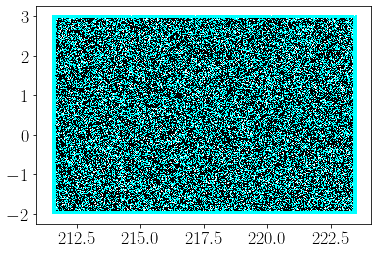

In [10]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(rand['RANDOM_RA'][rand['IS_BOUNDARY'].astype(bool)], rand['RANDOM_DEC'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='cyan')

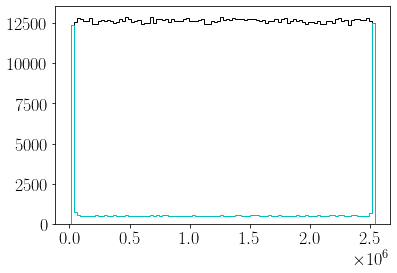

In [11]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

(0.0, 0.6)

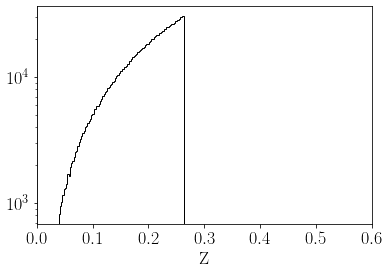

In [12]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')
pl.axvline(300. / 2.9979e5, lw=0.5, c='k')
pl.yscale('log')
pl.xlabel('Z')

pl.xlim(0.0, 0.6)

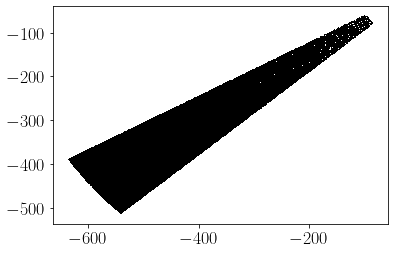

In [13]:
pl.plot(rand['CARTESIAN_X'][::10], rand['CARTESIAN_Y'][::10], marker=',', lw=0.0, c='k')

Text(0, 0.5, 'y')

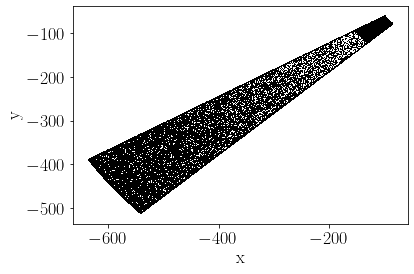

In [14]:
pl.plot(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)], rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')
pl.xlabel('x')
pl.ylabel('y')

(0.0, 1000.0)

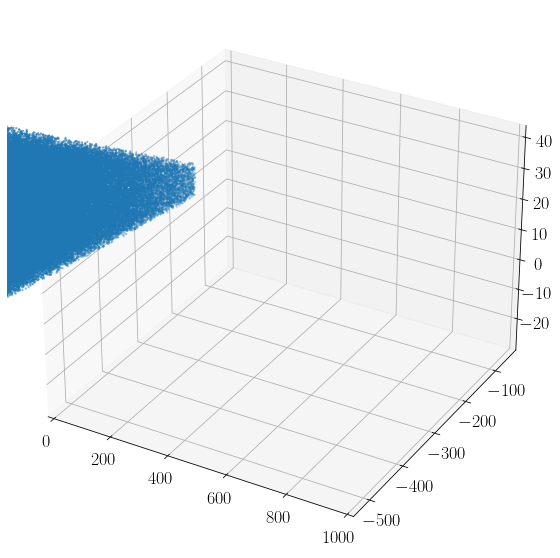

In [15]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][::10],\
           rand['CARTESIAN_Y'][::10],\
           rand['CARTESIAN_Z'][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

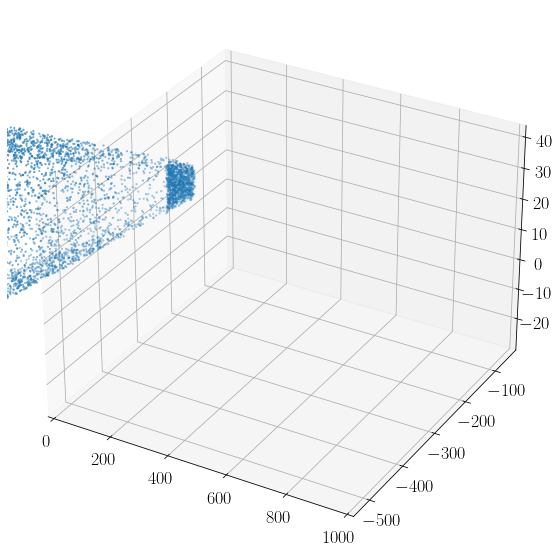

In [16]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Z'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [17]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.010000355462871903

In [18]:
np.mean(rand['IS_BOUNDARY'].data)

0.058793559012761114

In [19]:
rand.dtype.names

('RANDOM_RA',
 'RANDOM_DEC',
 'Z',
 'V',
 'RANDID',
 'FIELD',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'IS_BOUNDARY',
 'RAND_N8',
 'FILLFACTOR',
 'BOUND_DIST',
 'BOUND_ID',
 'DDP1_N8',
 'DDP2_N8',
 'DDP3_N8',
 'IN_DDP1',
 'DDP1_DELTA8',
 'DDP2_DELTA8',
 'DDP3_DELTA8',
 'DDP1_DELTA8_TIER')

In [20]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max()

(154, 1223)

(50.0, 1500.0)

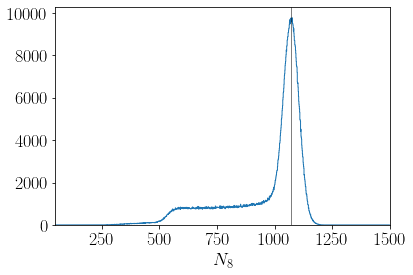

In [21]:
_ = pl.hist(rand['RAND_N8'], bins=np.arange(0, 1500, 1), histtype='step')
pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)
pl.xlabel(r'$N_8$')
pl.xlim(50., 1500.)

In [22]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

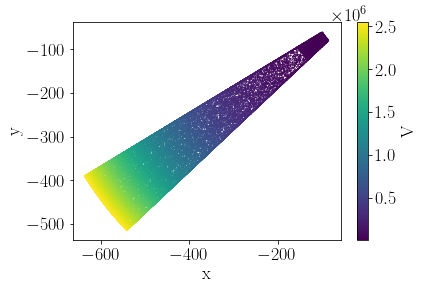

In [23]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['V'][isin], s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='V')

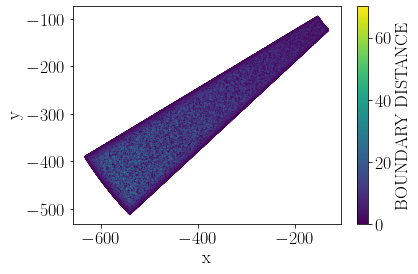

In [24]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='BOUNDARY DISTANCE')

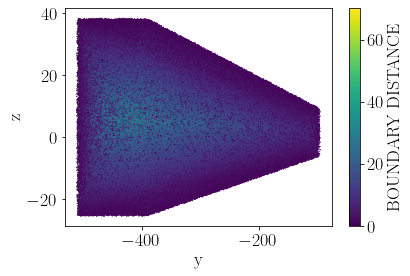

In [25]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_Y'][isin], rand['CARTESIAN_Z'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('y')
pl.ylabel('z')
pl.colorbar(label='BOUNDARY DISTANCE')

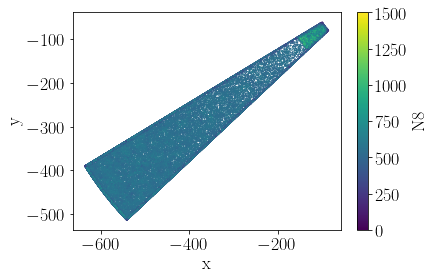

In [26]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['RAND_N8'][isin], vmin=0, vmax=1500, s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='N8')

(0.2, 1.2)

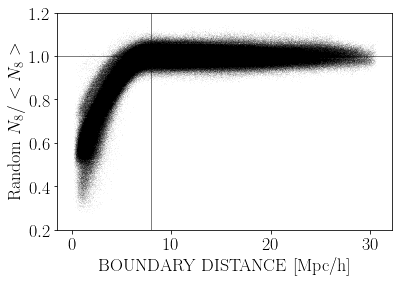

In [27]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'][isin], rand['RAND_N8'][isin] / rand.meta['NRAND8'], marker='.', lw=0.0, s=1, alpha=0.1, c='k')

pl.xlabel('BOUNDARY DISTANCE [Mpc/h]')
pl.ylabel(r'Random $N_8 / <N_8>$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

Text(0.5, 0, 'BOUND_DIST [Mpc/h]')

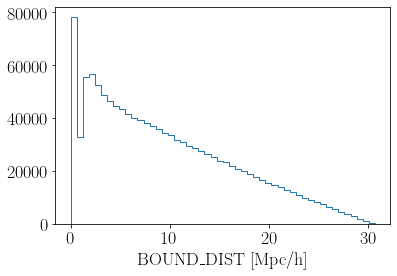

In [28]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [Mpc/h]')

In [29]:
gold = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp_n8.fits')
gold.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

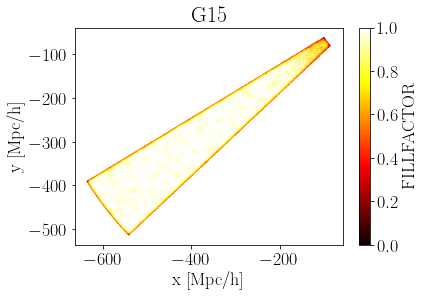

In [30]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

# TODO: Get from randoms header when available. 
ddp_zmin = gold.meta['DDP1_ZMIN']
ddp_zmax = gold.meta['DDP1_ZMAX']
        
isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
randoms_slice = randoms_slice_nolimits[isin]
    
plt.scatter(randoms_slice['CARTESIAN_X'],\
            randoms_slice['CARTESIAN_Y'],\
            c=randoms_slice['FILLFACTOR'],\
            marker='.',\
            lw=0.0,\
            s=1,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('x [Mpc/h]')
pl.ylabel('y [Mpc/h]')

pl.colorbar(label='FILLFACTOR')
    
# pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
# pl.ylim(-80., 80.)
    
plt.title('{}'.format(field))
plt.show()

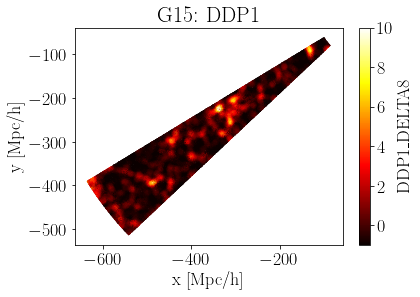

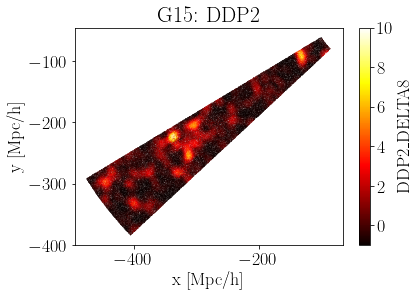

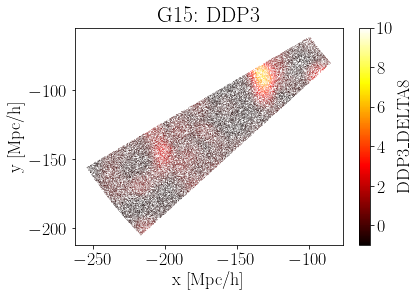

In [31]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 4, 1):
    # TODO: Get from randoms header when available. 
    ddp_zmin = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax = gold.meta['DDP{}_ZMAX'.format(idx)]
        
    isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
    randoms_slice = randoms_slice_nolimits[isin]
    
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=-1.,\
                vmax=10.,\
                cmap='hot')

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')

    pl.colorbar(label='DDP{}_DELTA8'.format(idx))
    
    # pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
    # pl.ylim(-80., 80.)
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [32]:
cmap = plt.cm.tab20c  # define the colormap

# extract all colors from the .jet map

cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 4, 5)
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)

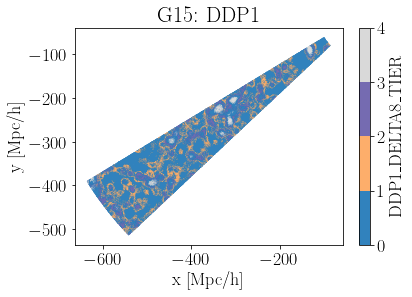

In [33]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 2, 1):
    # TODO: Get from randoms header when available. 
    ddp_zmin = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax = gold.meta['DDP{}_ZMAX'.format(idx)]
        
    isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
    randoms_slice = randoms_slice_nolimits[isin]
    
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8_TIER'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                cmap=cmap,\
                norm=norm)

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')

    pl.colorbar(label='DDP{}_DELTA8_TIER'.format(idx))
    
    # pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
    # pl.ylim(-80., 80.)
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

Text(0, 0.5, 'DDP2_DELTA8')

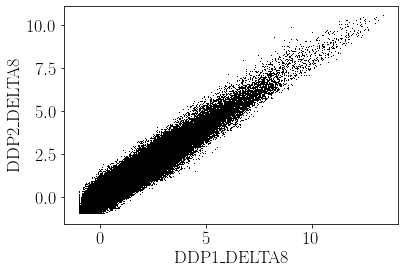

In [34]:
# Larger minimum redshift. 
ddp1_zmin = gold.meta['DDP1_ZMIN']

# Smaller maximum redshift. 
ddp3_zmax = gold.meta['DDP2_ZMAX']
            
isin = (rand['Z'] > ddp1_zmin) & (rand['Z'] < ddp3_zmax)

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlabel('DDP1_DELTA8')
pl.ylabel('DDP2_DELTA8')

# Done.